## Imports

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


## View Data Visualization


In [74]:
# Read the data
data = pd.read_csv('../Data/heart_2020_cleaned.csv')
data.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [75]:
# show columns with how many categories
data.nunique()


HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

**Target Class**

<AxesSubplot: xlabel='HeartDisease'>

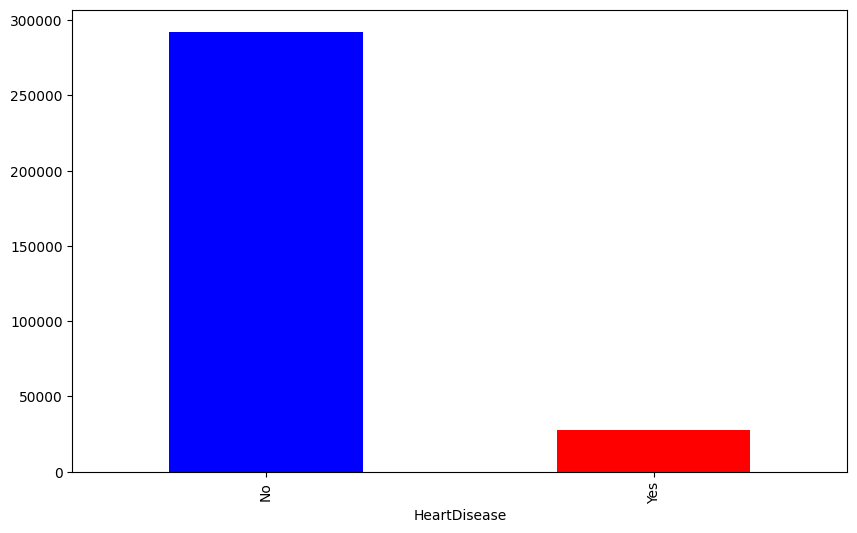

In [100]:
data['HeartDisease'].value_counts().plot(kind='bar', color=["blue", "red"],figsize=(10, 6))

## Categoral Classes Distribution

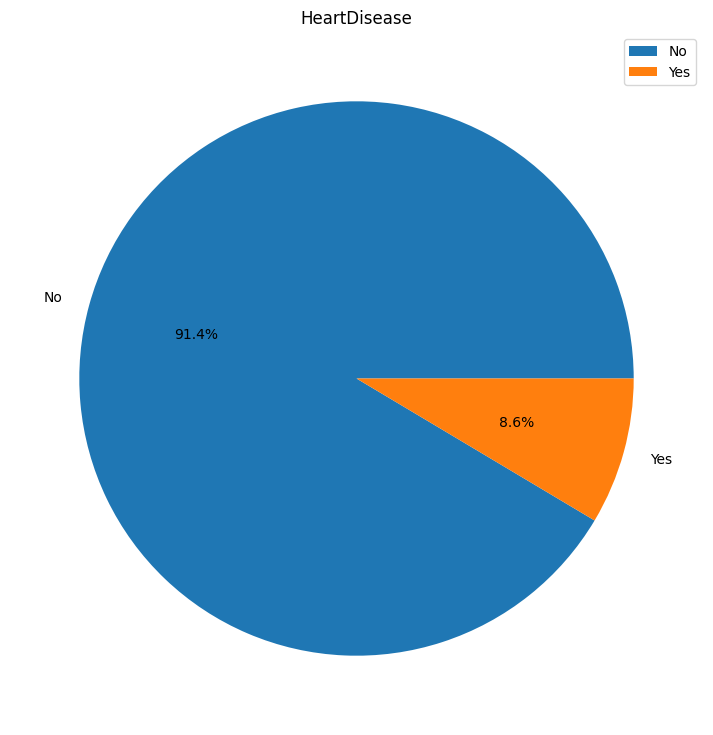

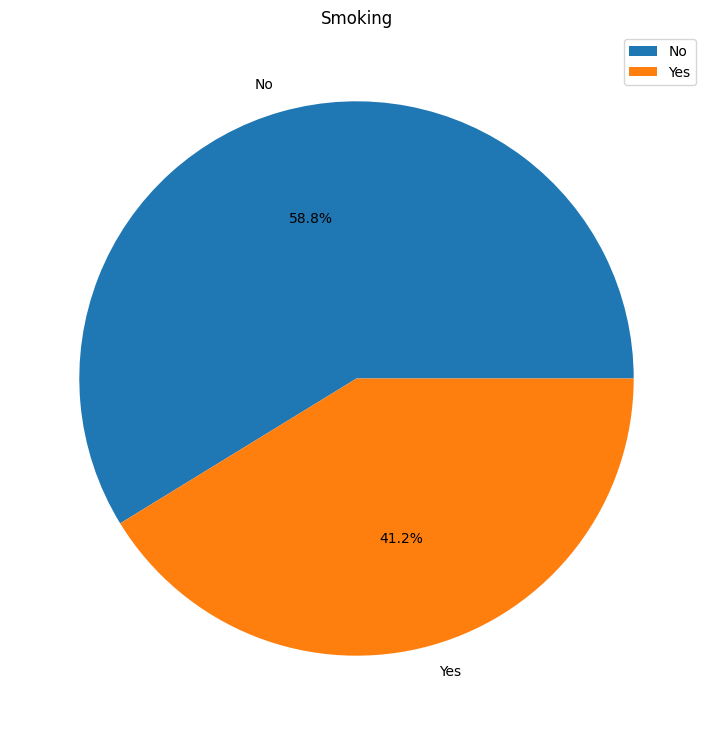

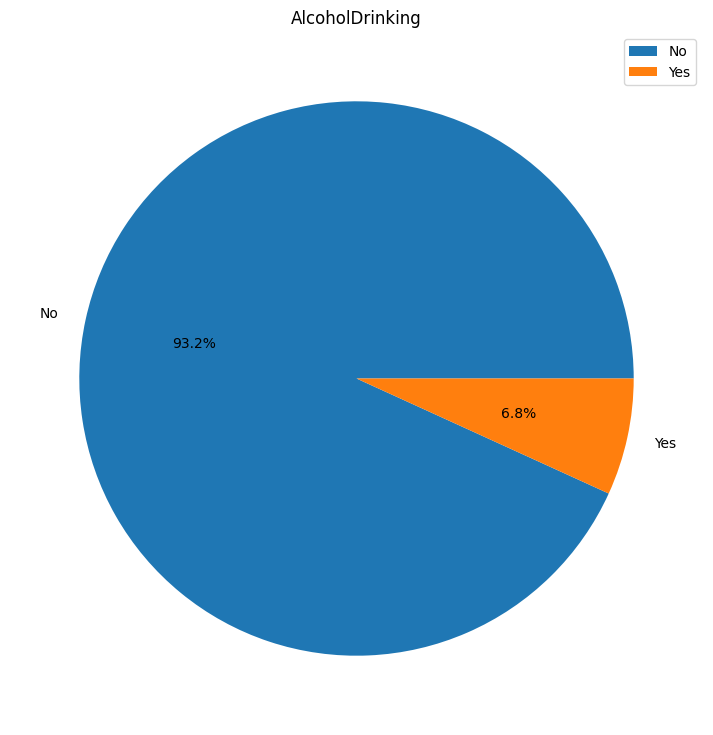

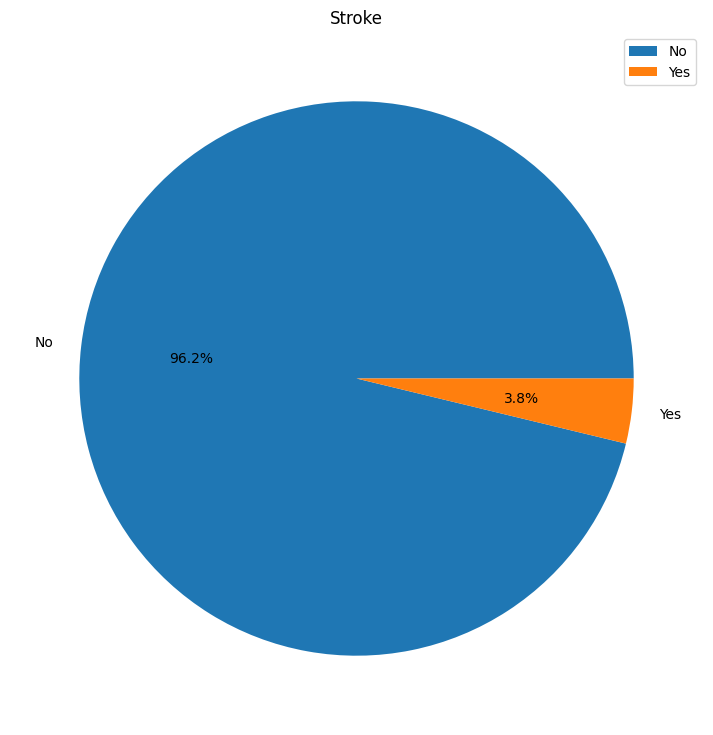

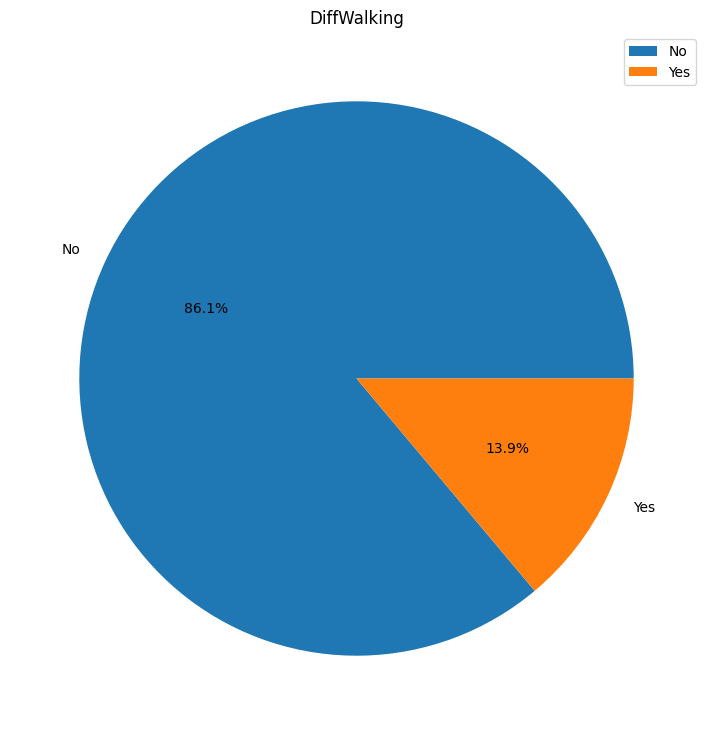

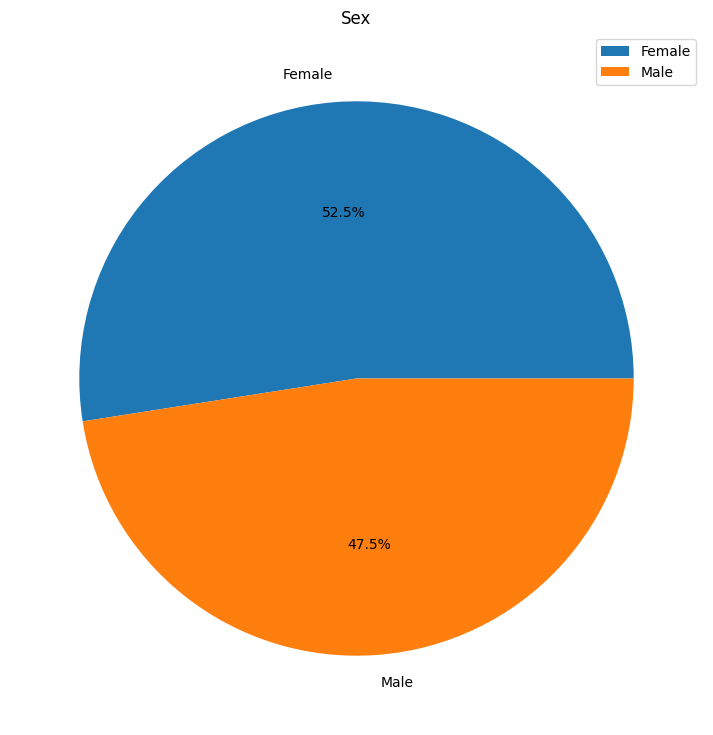

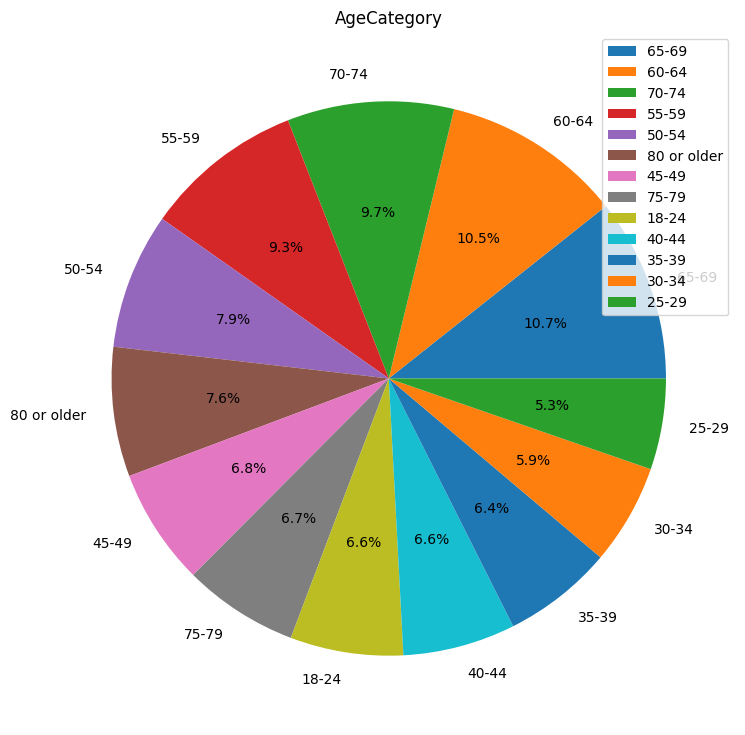

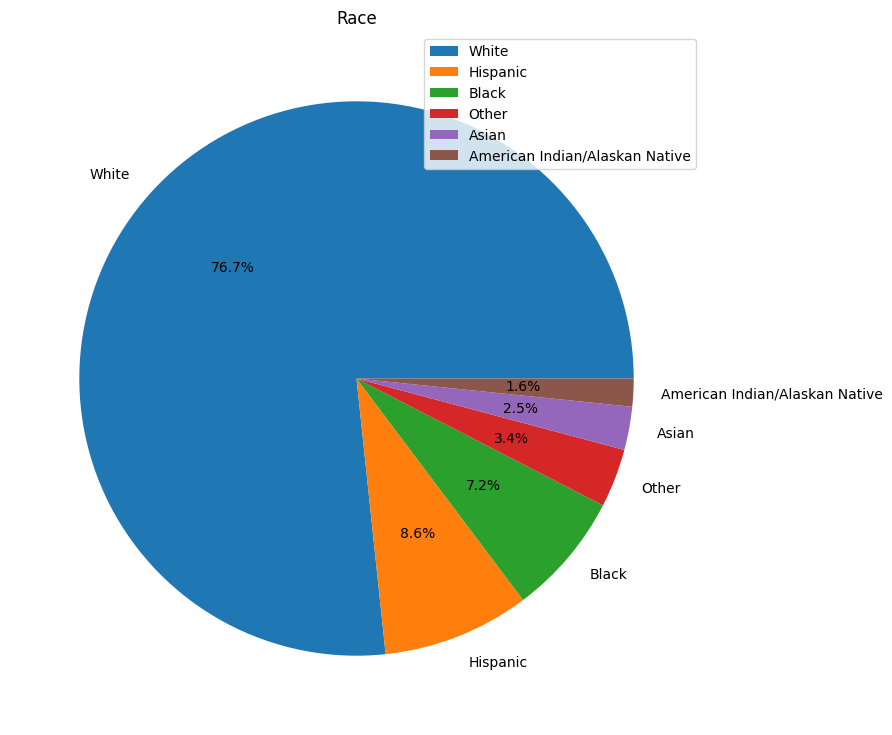

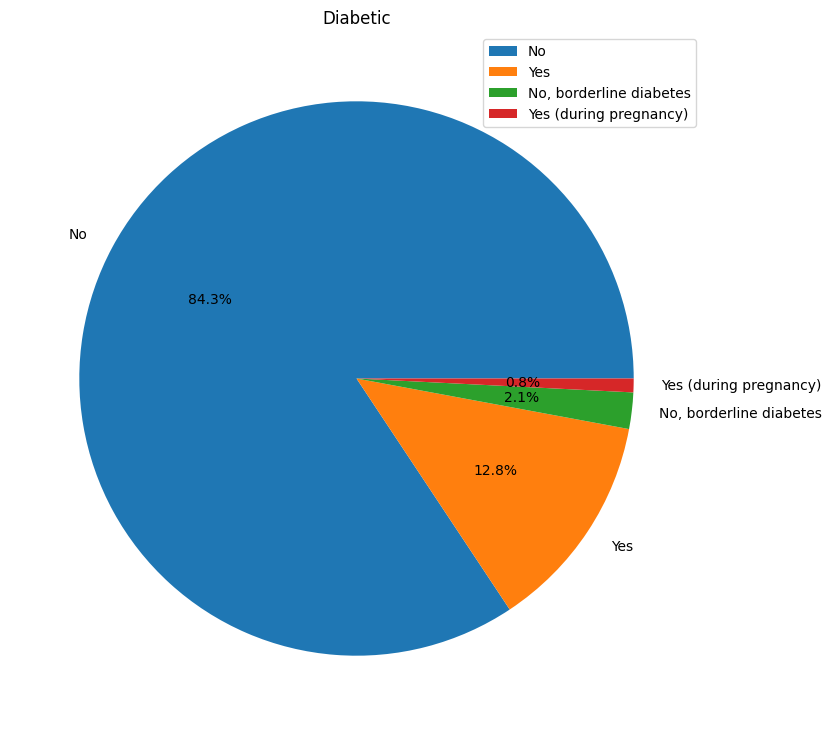

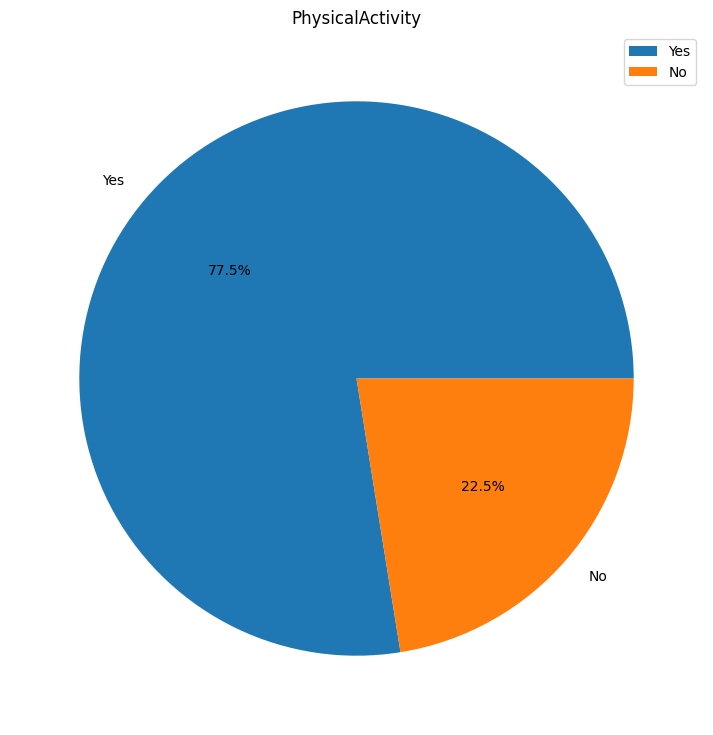

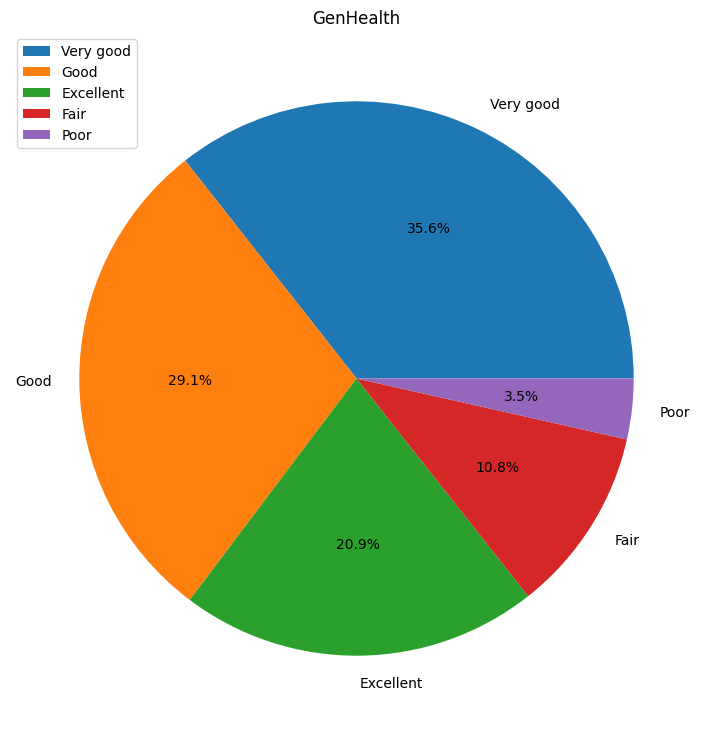

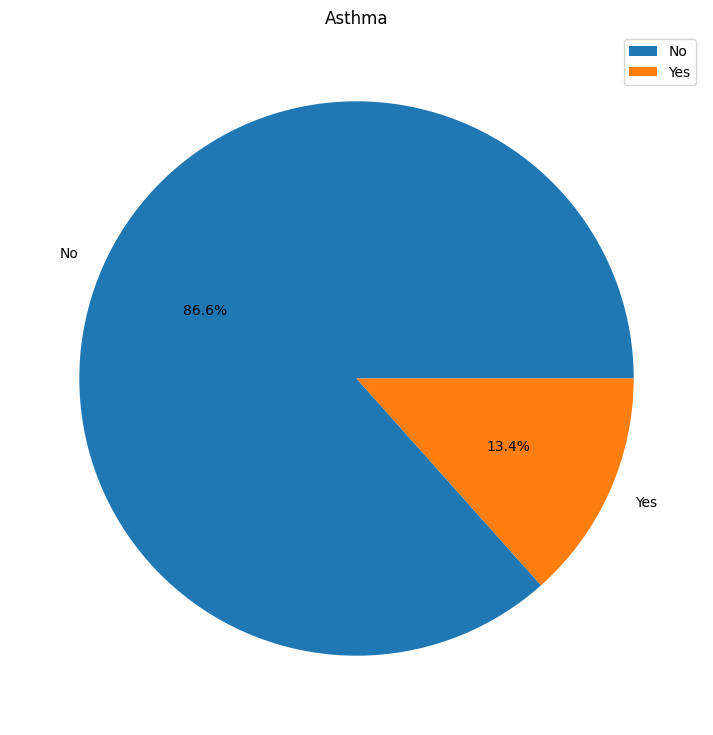

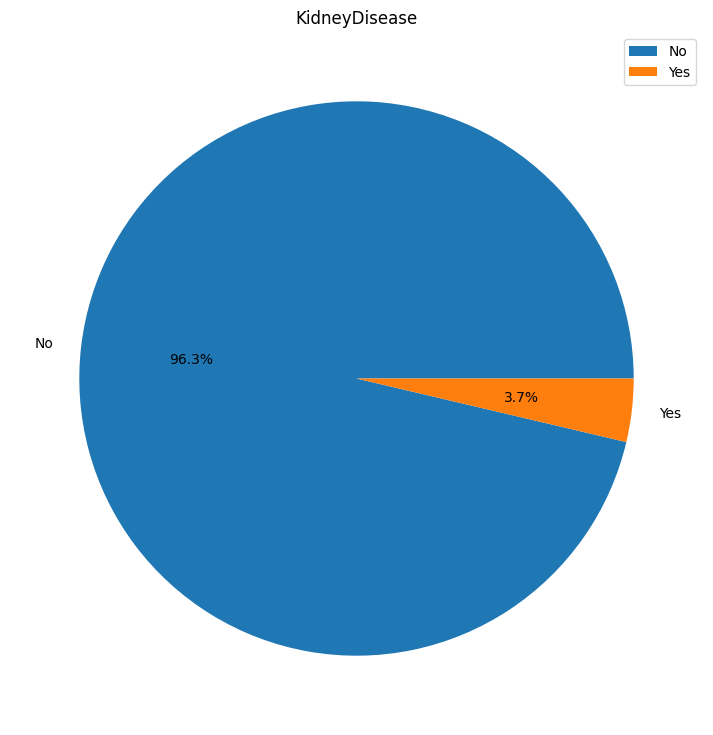

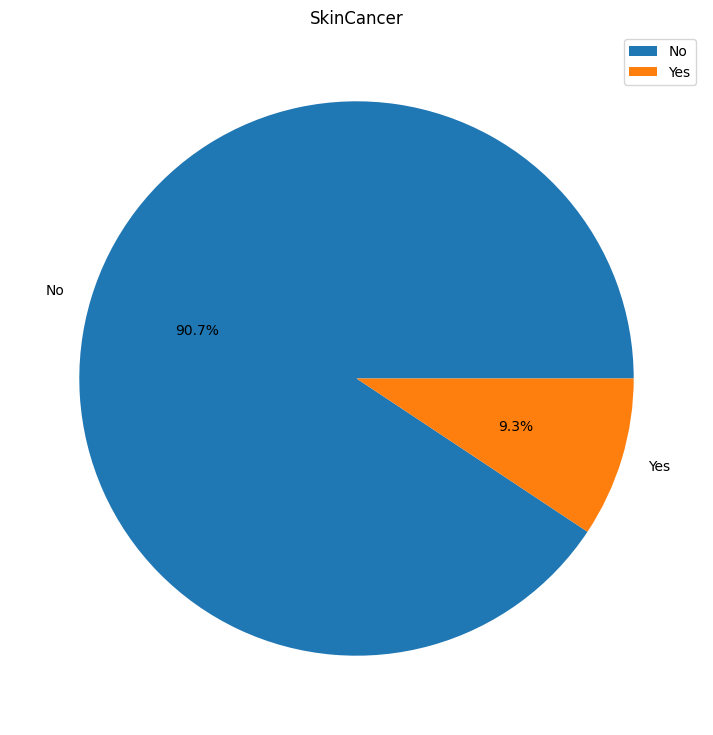

In [77]:
# show all columns distribution as a pie chart
arr = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
plots = []
for col in data.columns:
    if col not in  arr:
        data[col].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(11, 9), legend=True)
        plt.title(col)
        plt.ylabel('')
        plt.show()



## Numeric Distributions

In [78]:
## discibe the remaining columns
data[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].describe()


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


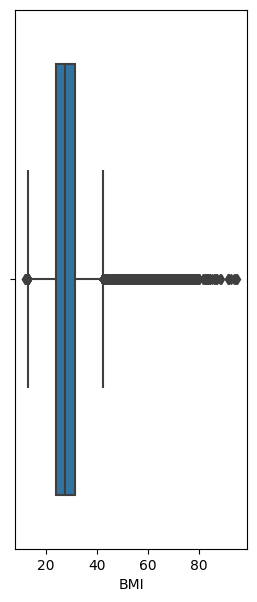

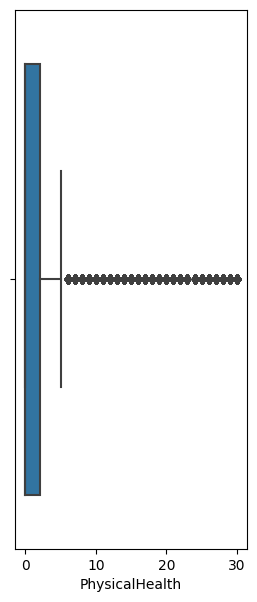

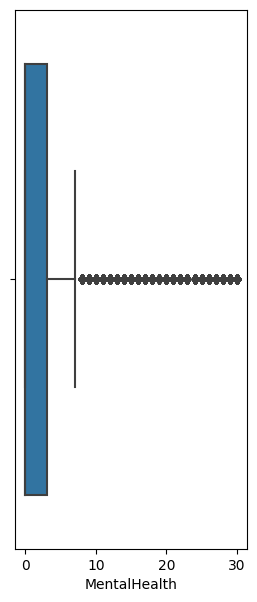

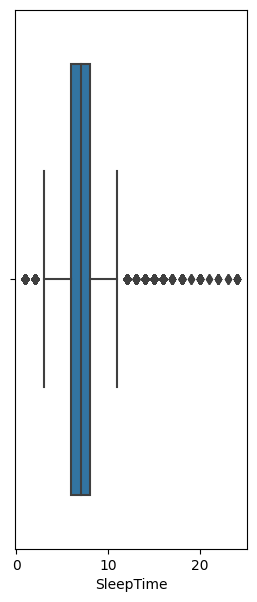

In [79]:
# show boxplot for BMI, PhysicalHealth, MentalHealth, SleepTime
arr = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
for col in arr:
    sns.boxplot(x=data[col])
    plt.show()


## EDA

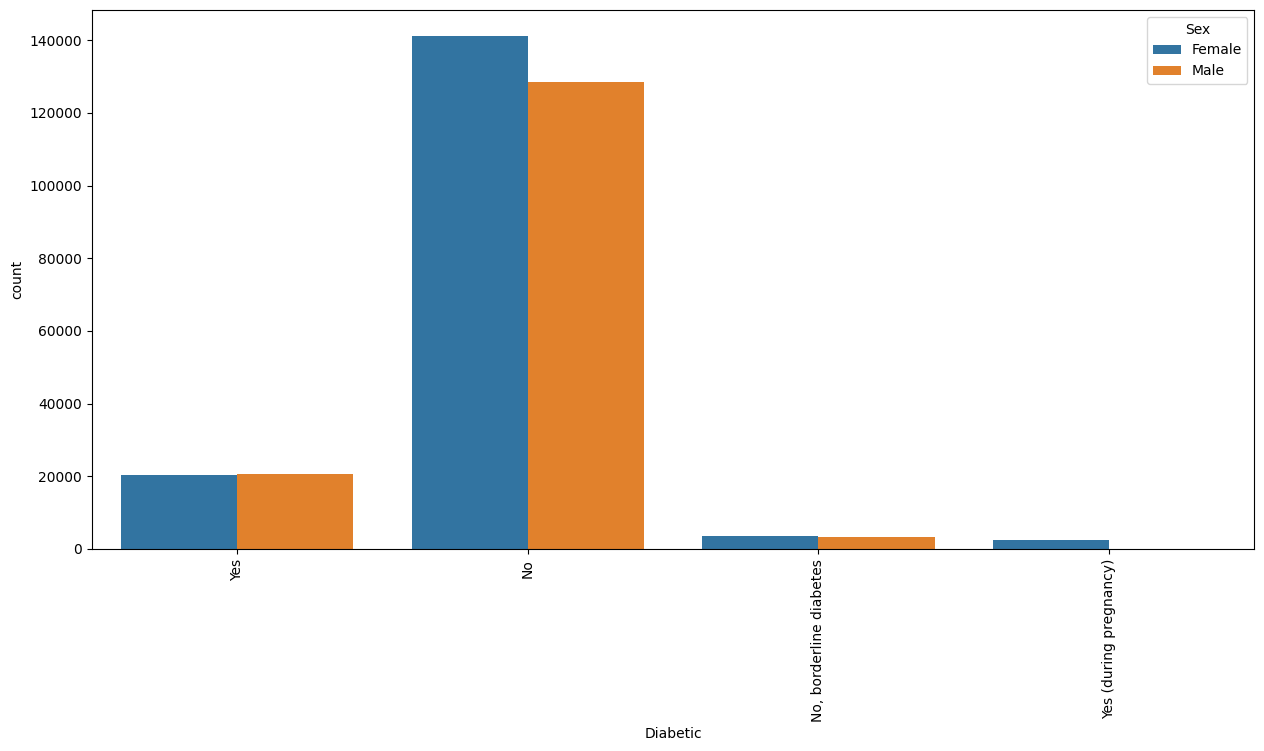

In [99]:
# show correlation between diabetics and Sex
sns.countplot(x=data['Diabetic'], hue=data['Sex'])
plt.rcParams['figure.figsize'] = (15, 20)
plt.xticks(rotation=90)
plt.show()

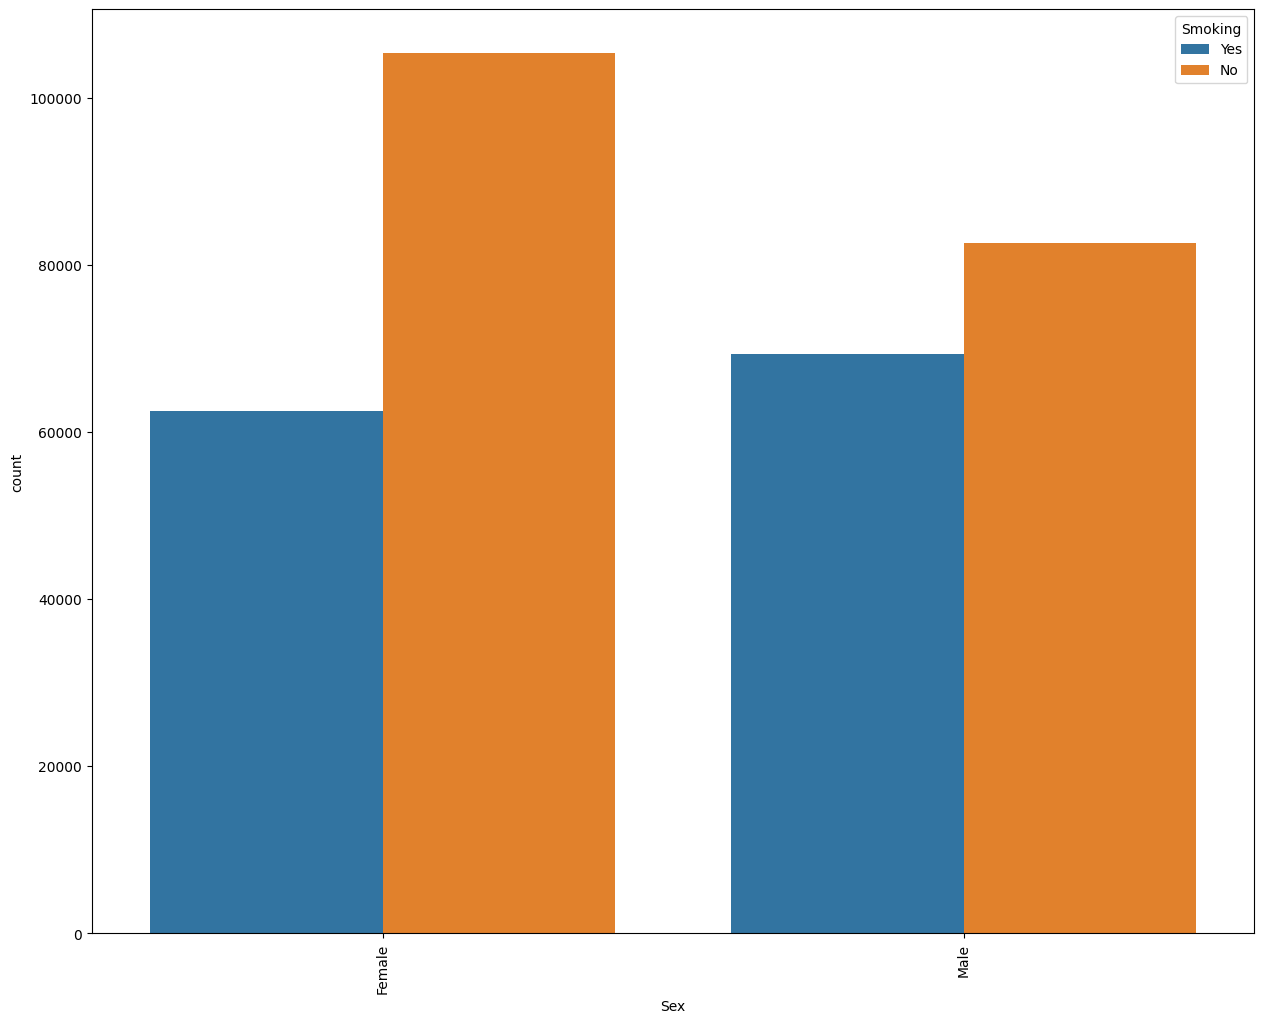

In [96]:
# show relation between gender and smoking
sns.countplot(x=data['Sex'], hue=data['Smoking'])
plt.rcParams['figure.figsize'] = (3, 20)
plt.xticks(rotation=90)
plt.show()

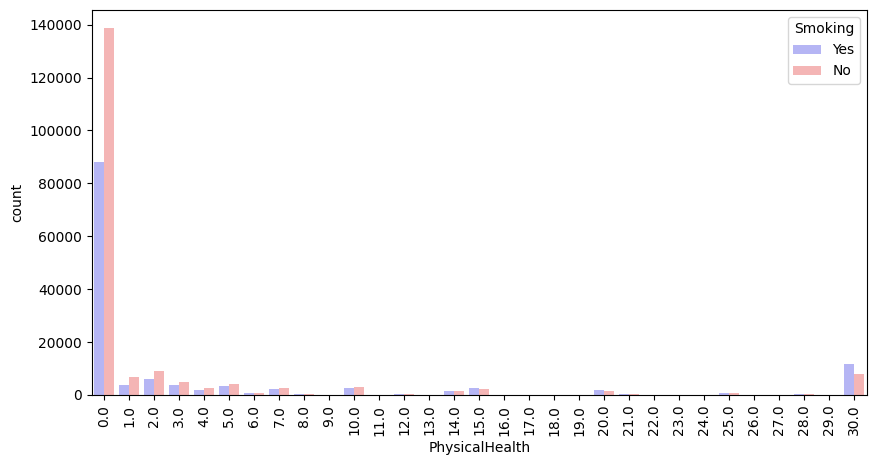

In [95]:
sns.countplot(x=data['PhysicalHealth'], hue=data['Smoking'], palette="bwr")
plt.rcParams['figure.figsize'] = (15, 12)
plt.xticks(rotation=90)
plt.show()

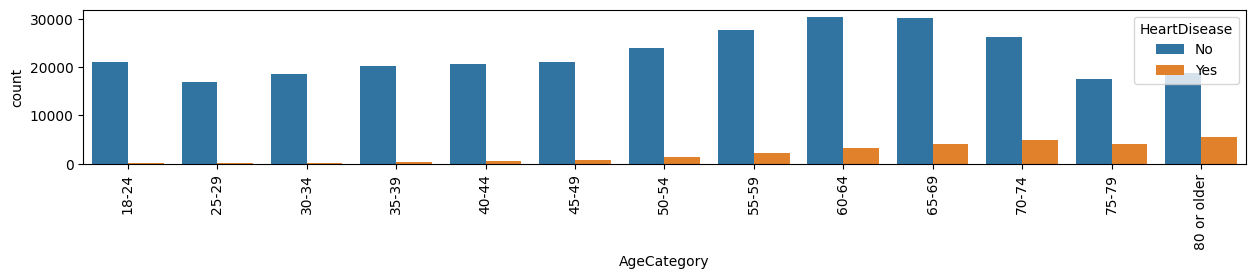

In [93]:
_data = data[data.HeartDisease != 'w r']
# make no in heart DISEASE has color red and yes has color blue
sns.countplot(x=_data['AgeCategory'], hue=_data['HeartDisease'], order=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64','65-69','70-74','75-79', '80 or older'])
plt.rcParams['figure.figsize'] = (15, 2)
plt.xticks(rotation=90)
plt.show()

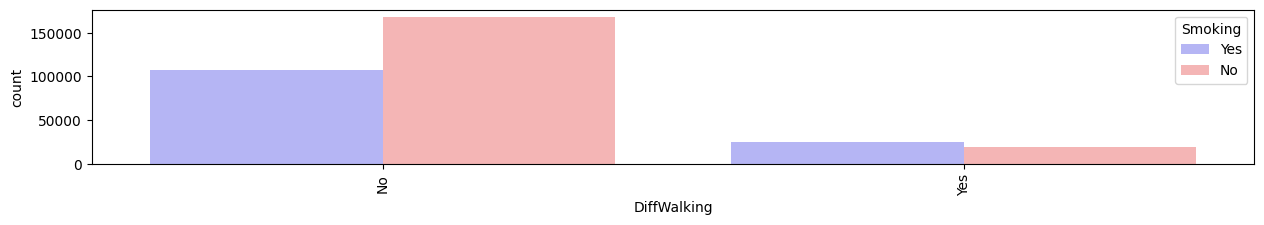

In [94]:
sns.countplot(x=data['DiffWalking'], hue=data['Smoking'], palette="bwr")
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(rotation=90)
plt.show()
# smoking --> diff walking


## Assocaition Rules

**Sex and Smoking**

In [82]:
# Select the desired columns
selected_columns = ['Sex', 'Smoking']
data_subset = data[selected_columns]
# Convert data subset to list of lists
data_list = data_subset.values.tolist()
print(data_list[:5])
# Convert data to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Format association rules
formatted_rules = rules.apply(
    lambda row: f"{list(row['antecedents'])[0]} -> {list(row['consequents'])[0]}", axis=1)

# Display the resulting rules
for rule in formatted_rules:
    print(rule, end="\n\n")


[['Female', 'Yes'], ['Female', 'No'], ['Male', 'Yes'], ['Female', 'No'], ['Female', 'No']]
No -> Female

Female -> No

Male -> No

Yes -> Male



**HeartDisease and PhysicalHealth**

In [83]:
# Select the desired columns
selected_columns = ['PhysicalHealth', 'HeartDisease']
data_copy = data.copy()
data_copy['PhysicalHealth'].describe()
#print(data_copy['PhysicalHealth'].head(10))
# make 4 categories for PhysicalHealth from 1 to 7 and 8 to 15 and 16 to 23 and 24 to 30
data_copy['PhysicalHealth'] = pd.cut(data_copy['PhysicalHealth'], bins=[-1, 7, 15, 23, 30], labels=['Excellent', 'verygood', 'good', 'fair'])
#print(data_copy['PhysicalHealth'].head(10))
data_subset = data_copy[selected_columns]
# Convert data subset to list of lists
data_list = data_subset.values.tolist()
print(data_list[:5])
# Convert data to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(
    frequent_itemsets, metric="confidence", min_threshold=0.5)

# Format association rules
formatted_rules = rules.apply(
    lambda row: f"{list(row['antecedents'])[0]} -> {list(row['consequents'])[0]}", axis=1)

# Display the resulting rules
for rule in formatted_rules:
    print(rule, end="\n\n")


[['Excellent', 'No'], ['Excellent', 'No'], ['good', 'No'], ['Excellent', 'No'], ['fair', 'No']]
Excellent -> No

No -> Excellent



**HeartDisease and DiffWalking**


In [84]:
selected_columns = ['PhysicalHealth', 'DiffWalking']
data_copy = data.copy()
data_copy['PhysicalHealth'].describe()
# print(data_copy['PhysicalHealth'].head(10))
# make 4 categories for PhysicalHealth from 1 to 7 and 8 to 15 and 16 to 23 and 24 to 30
data_copy['PhysicalHealth'] = pd.cut(data_copy['PhysicalHealth'], bins=[
                                     -1, 7, 15, 23, 30], labels=['Excellent', 'verygood', 'good', 'fair'])
# print(data_copy['PhysicalHealth'].head(10))
data_subset = data_copy[selected_columns]
# Convert data subset to list of lists
data_list = data_subset.values.tolist()
print(data_list[:5])
# Convert data to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(
    frequent_itemsets, metric="confidence", min_threshold=0.5)

# Format association rules
formatted_rules = rules.apply(lambda row: f"{list(row['antecedents'])[0]} -> {list(row['consequents'])[0]}", axis=1)

for rule in formatted_rules:
     print(rule, end="\n\n")


[['Excellent', 'No'], ['Excellent', 'No'], ['good', 'No'], ['Excellent', 'No'], ['fair', 'Yes']]
Excellent -> No

No -> Excellent



**HeartDisease and SleepTime**


In [85]:
selected_columns = ['SleepTime', 'HeartDisease']
data_copy = data.copy()
data_copy['SleepTime'] = pd.cut(data_copy['SleepTime'], bins=[0, 4, 9, 24], labels=['low', 'medium', 'high'])
data_subset = data_copy[selected_columns]
# Convert data subset to list of lists
data_list = data_subset.values.tolist()
print(data_list[:5])
# Convert data to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(
    frequent_itemsets, metric="confidence", min_threshold=0.5)

# Format association rules
formatted_rules = rules.apply(
    lambda row: f"{list(row['antecedents'])[0]} -> {list(row['consequents'])[0]}", axis=1)

# Display the resulting rules
for rule in formatted_rules:
    print(rule, end="\n\n")


[['medium', 'No'], ['medium', 'No'], ['medium', 'No'], ['medium', 'No'], ['medium', 'No']]
medium -> No

No -> medium



**HeartDisease and Smoking**


In [86]:
selected_columns = ['Smoking', 'HeartDisease']
data_copy = data.copy()
data_subset = data_copy[selected_columns]
# Convert data subset to list of lists
data_list = data_subset.values.tolist()
print(data_list[:5])
# Convert data to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
# Format association rules
formatted_rules = rules.apply(lambda row: f"{list(row['antecedents'])[0]} -> {list(row['consequents'])[0]}", axis=1)
# Display the resulting rules
for rule in formatted_rules:
    print(rule, end="\n\n")


[['Yes', 'No'], ['No', 'No'], ['Yes', 'No'], ['No', 'No'], ['No', 'No']]
Yes -> No



**HeartDisease and Sex**


In [87]:
selected_columns = ['HeartDisease', 'Sex']
data_copy = data.copy()
data_subset = data_copy[selected_columns]
# Convert data subset to list of lists
data_list = data_subset.values.tolist()
print(data_list[:5])
# Convert data to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(
    frequent_itemsets, metric="confidence", min_threshold=0.5)
# Format association rules
formatted_rules = rules.apply(
    lambda row: f"{list(row['antecedents'])[0]} -> {list(row['consequents'])[0]}", axis=1)
# Display the resulting rules
for rule in formatted_rules:
    print(rule, end="\n\n")


[['No', 'Female'], ['No', 'Female'], ['No', 'Male'], ['No', 'Female'], ['No', 'Female']]
No -> Female

Female -> No

Male -> No



**HeartDisease and Age**


In [88]:
selected_columns = ['HeartDisease', 'AgeCategory']
data_copy = data.copy()
data_subset = data_copy[selected_columns]
# Convert data subset to list of lists
data_list = data_subset.values.tolist()
print(data_list[:5])
# Convert data to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(
    frequent_itemsets, metric="confidence", min_threshold=0.5)
# Format association rules
formatted_rules = rules.apply(
    lambda row: f"{list(row['antecedents'])[0]} -> {list(row['consequents'])[0]}", axis=1)
# Display the resulting rules
for rule in formatted_rules:
    print(rule, end="\n\n")

# no ruless

[['No', '55-59'], ['No', '80 or older'], ['No', '65-69'], ['No', '75-79'], ['No', '40-44']]
antecedents

consequents

antecedent support

consequent support

support

confidence

lift

leverage

conviction

zhangs_metric



In [89]:
# show pysical helath relation with smoking
# sns.countplot(x=data['PhysicalHealth'], hue=data['Smoking'], palette="bwr")
# plt.rcParams['figure.figsize'] = (15, 2)
# plt.xticks(rotation=90)
# plt.show()


In [90]:
# make a plot that show the relation between AgeCategory and HeartDisease
# dont show wr in heart disease
# _data = data[data.HeartDisease != 'w r']
# # make no in heart DISEASE has color red and yes has color blue
# sns.countplot(x=_data['AgeCategory'], hue=_data['HeartDisease'], order=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64','65-69','70-74','75-79', '80 or older'])
# plt.rcParams['figure.figsize'] = (15, 2)
# plt.xticks(rotation=90)
# plt.show()



In [91]:
# show relation between diff walking and smoking
# sns.countplot(x=data['DiffWalking'], hue=data['Smoking'], palette="bwr")
# plt.rcParams['figure.figsize'] = (10, 5)
# plt.xticks(rotation=90)
# plt.show()
# # smoking --> diff walking 